In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
bds = np.load("../proprietary/edh_boundaries.npy")
tr = np.load("../proprietary/transients_interp.npy")

In [42]:
bds[0, :]

array([ 5966, 11933, 17900, 23867, 29834, 35800, 41767, 47734, 53701,
       57185, 57845, 58268, 58633, 58999, 59425, 60095, 63323, 66154,
       67596, 69043, 70880, 72920, 74921, 76944, 79013, 81135, 83794,
       86693, 89715, 92933, 96345])

In [43]:
tr.shape

(29, 100000)

In [44]:
tr[0, :]

array([0.0011    , 0.0011    , 0.0011    , ..., 0.00178094, 0.00178094,
       0.00178095])

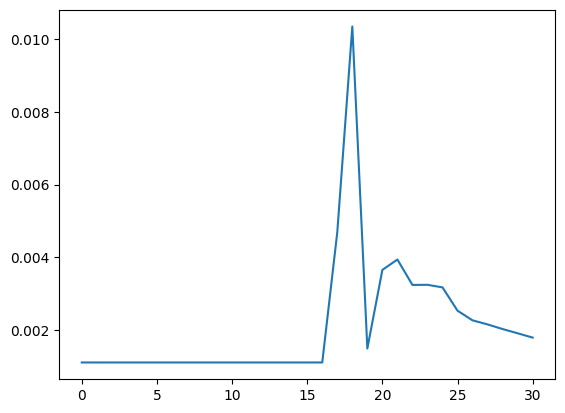

In [45]:
tr1s = np.array_split(tr[0, :], 31)
for i, arr in enumerate(tr1s):
    tr1s[i] = np.mean(arr)
bd1 = list(range(0, np.max(bds[0, :]), np.max(bds[0, :]) // 31))[1:]
plt.plot(tr1s)

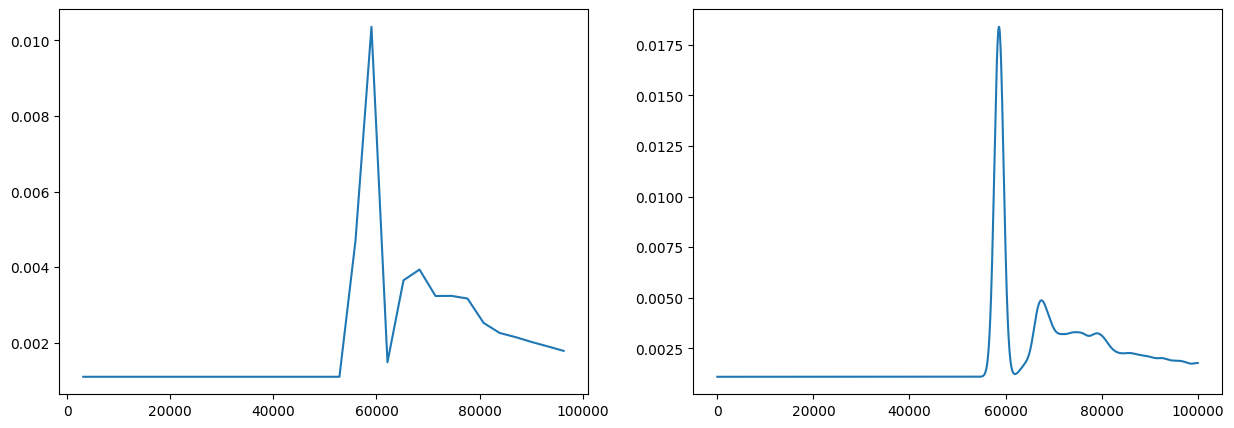

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(bd1, tr1s)
ax[1].plot(tr[0, :])

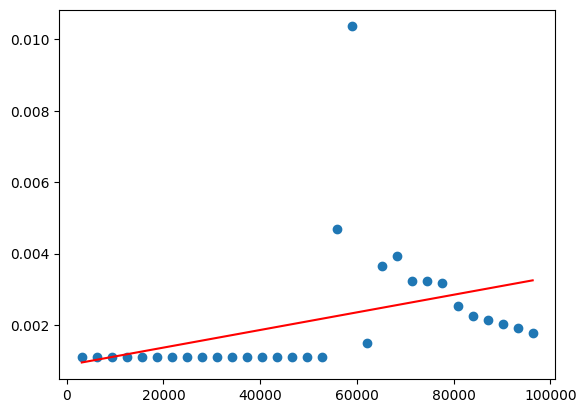

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

lm = LinearRegression().fit(np.array(bd1).reshape(-1, 1), tr1s)
pred_vals = lm.predict(np.array(bd1).reshape(-1, 1))
plt.scatter(bd1, tr1s)
plt.plot(bd1, pred_vals, 'r')

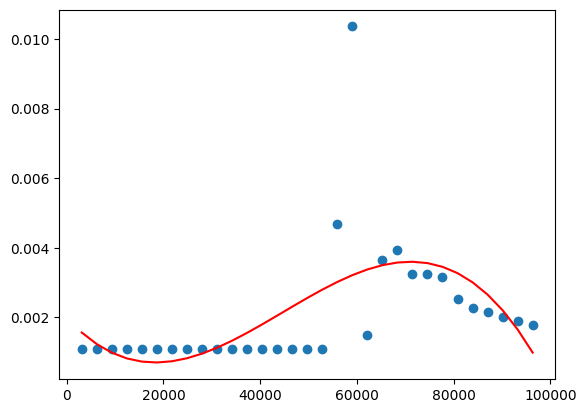

In [49]:
poly_x = PolynomialFeatures(degree=3, include_bias=False).fit_transform(np.array(bd1).reshape(-1, 1))
poly_lm = LinearRegression().fit(poly_x, tr1s)
pred_poly_vals = poly_lm.predict(poly_x)
plt.scatter(bd1, tr1s)
plt.plot(bd1, pred_poly_vals, 'r')

## Testing Gaussian Process Regression

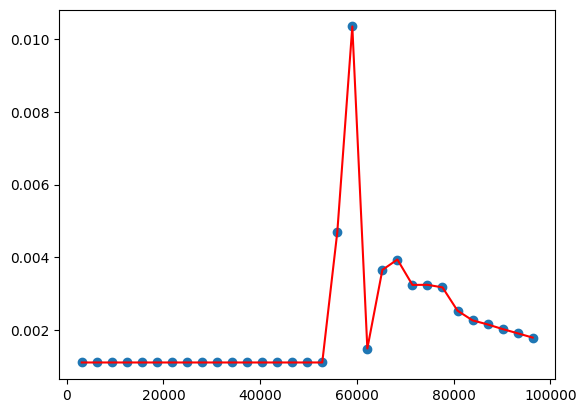

In [50]:
from sklearn.gaussian_process import GaussianProcessRegressorx

gaussian_reg = GaussianProcessRegressor().fit(np.array(bd1).reshape(-1, 1), tr1s)
pred_gauss_vals = gaussian_reg.predict(np.array(bd1).reshape(-1, 1))
plt.scatter(bd1, tr1s)
plt.plot(bd1, pred_gauss_vals, 'r')

In [51]:
gaussian_reg.kernel_

1**2 * RBF(length_scale=1)

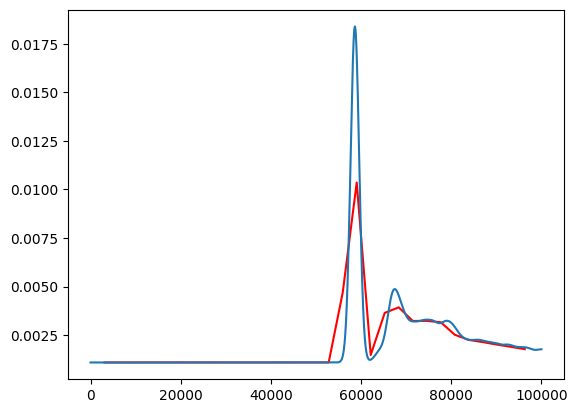

In [52]:
plt.plot(bd1, pred_gauss_vals, 'r')
plt.plot(tr[0, :])

In [55]:
from statistics import mean, variance
if mean(tr1s) == variance(tr1s):
    print('yay!')
else:
    print(f'{mean(tr1s)} | {variance(tr1s)}')

0.002100323772120097 | 3.4041933935964103e-06


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bounds = np.load('../proprietary/edh_boundaries.npy')
transients = np.load('../proprietary/transients_interp.npy')

# Get avg transient value for each bucket
tr1 = np.array([np.mean(arr) for arr in np.array_split(transients[0, :], 31)])
# split timestamps into 31 buckets
bd1 = np.arange(0, np.max(bounds[0, :]), np.max(bounds[0, :]) // 31)[1:]
bd1, tr1

(array([ 3107,  6214,  9321, 12428, 15535, 18642, 21749, 24856, 27963,
        31070, 34177, 37284, 40391, 43498, 46605, 49712, 52819, 55926,
        59033, 62140, 65247, 68354, 71461, 74568, 77675, 80782, 83889,
        86996, 90103, 93210, 96317]),
 array([0.0011    , 0.0011    , 0.0011    , 0.0011    , 0.0011    ,
        0.0011    , 0.0011    , 0.0011    , 0.0011    , 0.0011    ,
        0.0011    , 0.0011    , 0.0011    , 0.0011    , 0.0011    ,
        0.0011    , 0.00110032, 0.00468813, 0.01035733, 0.00148488,
        0.00365075, 0.00393651, 0.0032368 , 0.00323998, 0.00316904,
        0.00252679, 0.00226022, 0.00214878, 0.00202083, 0.00190445,
        0.00178522]))

(array([0.0011    , 0.0011    , 0.0011    , 0.0011    , 0.0011    ,
        0.0011    , 0.0011    , 0.0011    , 0.0011    , 0.0011    ,
        0.0011    , 0.0011    , 0.0011    , 0.0011    , 0.0011    ,
        0.0011    , 0.00110032, 0.00468813, 0.01035733, 0.00148488,
        0.00365075, 0.00393651, 0.0032368 , 0.00323998, 0.00316904,
        0.00252679, 0.00226022, 0.00214878, 0.00202083, 0.00190445,
        0.00178522]),
 array([ 3107.        ,  6113.77419355,  9120.5483871 , 12127.32258065,
        15134.09677419, 18140.87096774, 21147.64516129, 24154.41935484,
        27161.19354839, 30167.96774194, 33174.74193548, 36181.51612903,
        39188.29032258, 42195.06451613, 45201.83870968, 48208.61290323,
        51215.38709677, 54222.16129032, 57228.93548387, 60235.70967742,
        63242.48387097, 66249.25806452, 69256.03225806, 72262.80645161,
        75269.58064516, 78276.35483871, 81283.12903226, 84289.90322581,
        87296.67741935, 90303.4516129 , 93310.22580645, 96317.    

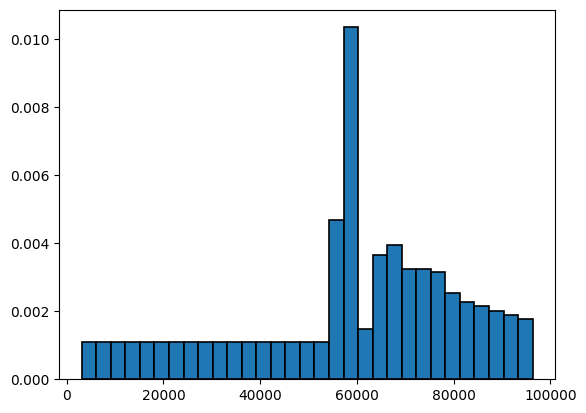

In [6]:
plt.hist(bd1, bins=len(bd1), weights=tr1, edgecolor='black', linewidth=1.2)

(array([[29.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 29.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  2.,  0., 27.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  2.,  0.,  1.,  2., 24.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  1.,  1.,  2.,  1.,  3., 20.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  2.,  1.,  2.,  1.,  3.,  1.,  2., 17.,  0.,  0.,
          0

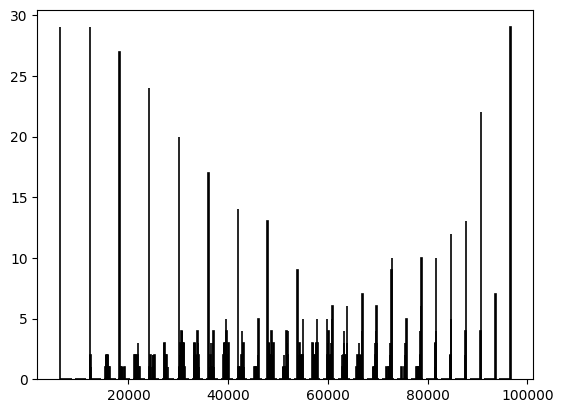

In [8]:
plt.hist(bounds, bins=len(bd1), edgecolor='black', linewidth=1.2)